**Setting Up Gemini Key**

In [ ]:
import google.generativeai as genai

# Hardcoded Gemini API key (private use only) don't include key on shared copy
api_key = "include own key here"
genai.configure(api_key=api_key)

# Load Gemini 2.5 Pro model
model = genai.GenerativeModel("models/gemini-2.5-pro")

# Test the setup
response = model.generate_content("Test")
print(response.text)

Test received. I am functioning correctly.

How can I help you?


**Load Dataset from BigQuery**

In [ ]:
# Install and import BigQuery + Pandas
!pip install --upgrade google-cloud-bigquery pandas --quiet

from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Authenticate
auth.authenticate_user()

# Initialize BigQuery client
client = bigquery.Client(project="mgmt590-brucaj-assignment-1")

# Base Query as a test
query = """
    SELECT *
    FROM `mgmt590-brucaj-assignment-1.superstore_data.superstore`
"""

# Run the test query
df = client.query(query).to_dataframe()

df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2021-154900,2020-02-25,2020-03-01,Sung Shariari,Avery,Avery 518,Consumer,Office Supplies,Labels,East,1453,Leominster,Massachusetts,United States,0.0,1.5120,1,3.15,0.48
1,US-2021-154900,2020-02-25,2020-03-01,Sung Shariari,Adams,Adams Telephone Message Book W/Dividers/Space ...,Consumer,Office Supplies,Paper,East,1453,Leominster,Massachusetts,United States,0.0,10.2240,4,22.72,0.45
2,US-2022-152415,2021-09-17,2021-09-22,Patrick O'Donnell,C-Line,"C-Line Magnetic Cubicle Keepers, Clear Polypro...",Consumer,Furniture,Furnishings,East,1752,Marlborough,Massachusetts,United States,0.0,6.2244,3,14.82,0.42
3,US-2022-152415,2021-09-17,2021-09-22,Patrick O'Donnell,Howard Miller,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",Consumer,Furniture,Furnishings,East,1752,Marlborough,Massachusetts,United States,0.0,61.3824,3,191.82,0.32
4,US-2022-153269,2021-03-09,2021-03-12,Pamela Stobb,Other,"Situations Contoured Folding Chairs, 4/Set",Consumer,Furniture,Chairs,East,1810,Andover,Massachusetts,United States,0.0,88.7250,5,354.90,0.25


**For Customer Behavior Analyst:**

- Focus Questions:

Who are our most valuable customers?

What patterns exist in customer purchasing?

How can we improve customer retention?

- Required Analysis:

Customer segmentation and profiling

Purchase pattern analysis

Customer lifetime value indicators

**1. Who are our most valuable customers?**

In [ ]:
customer_summary = df.groupby('customer').agg({
    'order_id': 'nunique',
    'sales': 'sum',
    'profit': 'sum'
}).reset_index().rename(columns={
    'order_id': 'total_orders',
    'sales': 'total_sales',
    'profit': 'total_profit'
}).sort_values('total_sales', ascending=False)

customer_summary.head()

,customer,total_orders,total_sales,total_profit
686,Sean Miller,5,25043.050,-1980.7393
730,Tamara Chand,5,19052.218,8981.3239
622,Raymond Buch,6,15117.339,6976.0959
757,Tom Ashbrook,4,14595.620,4703.7883
6,Adrian Barton,10,14473.571,5444.8055


/tmp/ipython-input-46-3268347339.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sales, x='total_sales', y='customer', ax=axs[0], palette='Blues_d')
/tmp/ipython-input-46-3268347339.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_orders, x='total_orders', y='customer', ax=axs[1], palette='Greens_d')
/tmp/ipython-input-46-3268347339.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit, x='total_profit', y='customer', ax=axs[2], palette='Oranges_d')


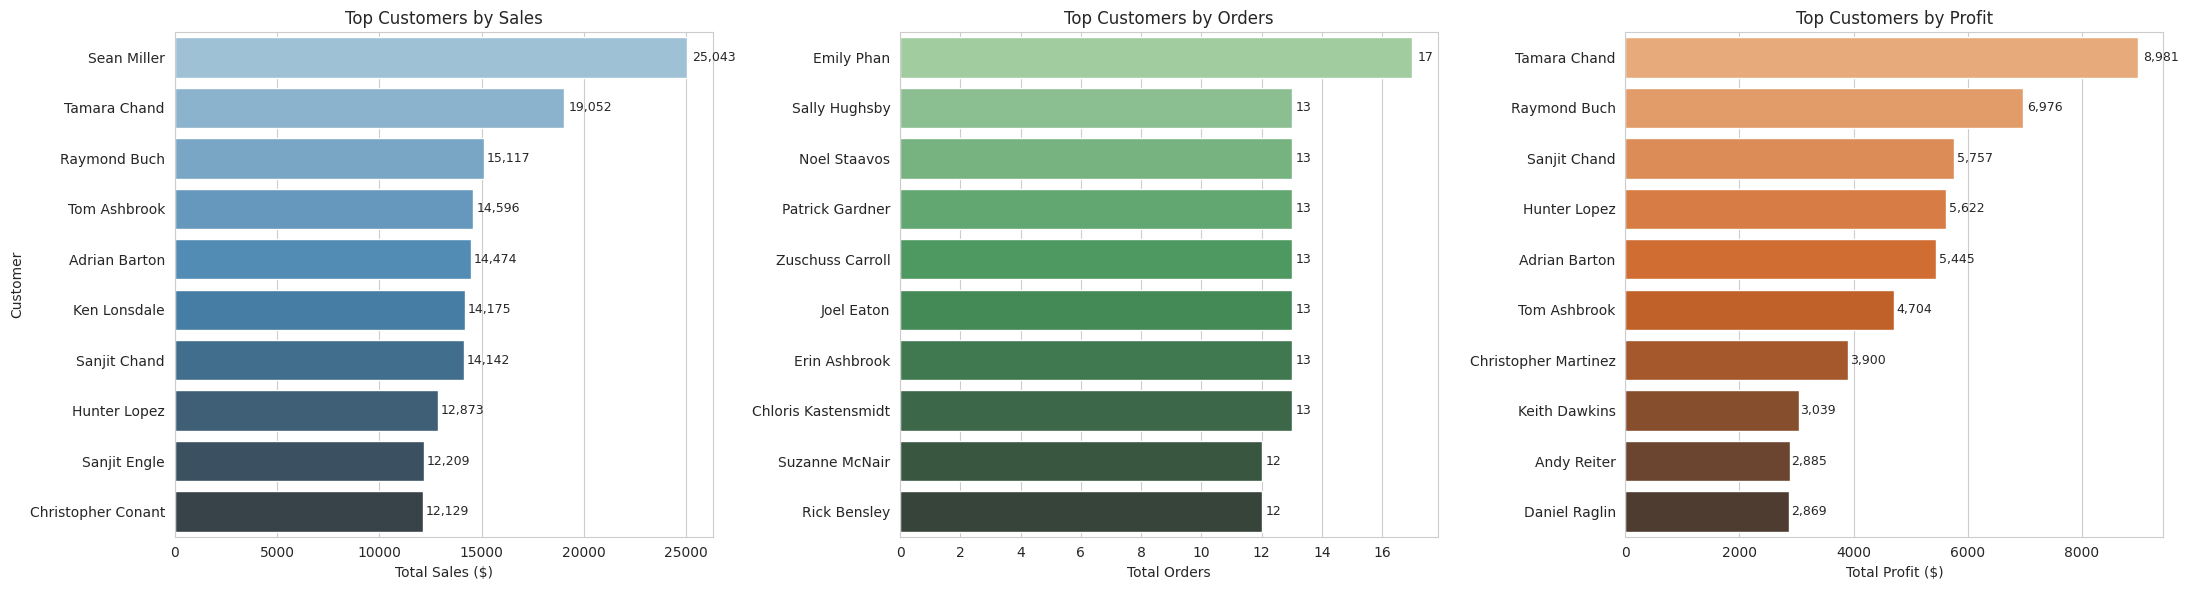

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate customer-level metrics
customer_summary = df.groupby('customer').agg({
    'order_id': 'nunique',
    'sales': 'sum',
    'profit': 'sum'
}).reset_index().rename(columns={
    'order_id': 'total_orders',
    'sales': 'total_sales',
    'profit': 'total_profit'
})

# 2. Sort top 10s
top_sales = customer_summary.sort_values('total_sales', ascending=False).head(10)
top_orders = customer_summary.sort_values('total_orders', ascending=False).head(10)
top_profit = customer_summary.sort_values('total_profit', ascending=False).head(10)

# 3. Create subplots
fig, axs = plt.subplots(1, 3, figsize=(22, 6))
sns.set_style("whitegrid")

def add_labels(ax, data_col):
    for p in ax.patches:
        val = p.get_width()
        ax.text(val + (0.01 * val), p.get_y() + p.get_height() / 2,
                f'{val:,.0f}', va='center', fontsize=9)

# Total Sales Chart
sns.barplot(data=top_sales, x='total_sales', y='customer', ax=axs[0], palette='Blues_d')
axs[0].set_title("Top Customers by Sales")
axs[0].set_xlabel("Total Sales ($)")
axs[0].set_ylabel("Customer")
add_labels(axs[0], 'total_sales')

# Total Orders Chart
sns.barplot(data=top_orders, x='total_orders', y='customer', ax=axs[1], palette='Greens_d')
axs[1].set_title("Top Customers by Orders")
axs[1].set_xlabel("Total Orders")
axs[1].set_ylabel("")
add_labels(axs[1], 'total_orders')

# Total Profit Chart
sns.barplot(data=top_profit, x='total_profit', y='customer', ax=axs[2], palette='Oranges_d')
axs[2].set_title("Top Customers by Profit")
axs[2].set_xlabel("Total Profit ($)")
axs[2].set_ylabel("")
add_labels(axs[2], 'total_profit')

plt.tight_layout()
plt.show()

In [ ]:
# Get customer names from each top 10 list
sales_customers = set(top_sales['customer'])
order_customers = set(top_orders['customer'])
profit_customers = set(top_profit['customer'])

# Combine all unique top customers
all_top_customers = sorted(sales_customers | order_customers | profit_customers)

# Create a summary table
summary_data = []
for cust in all_top_customers:
    summary_data.append({
        "Customer": cust,
        "In Top Sales?": "✅" if cust in sales_customers else "",
        "In Top Orders?": "✅" if cust in order_customers else "",
        "In Top Profit?": "✅" if cust in profit_customers else ""
    })

customer_value_summary = pd.DataFrame(summary_data)

# Show the summary table
customer_value_summary

,Customer,In Top Sales?,In Top Orders?,In Top Profit?
0,Adrian Barton,✅,,✅
1,Andy Reiter,,,✅
2,Chloris Kastensmidt,,✅,
3,Christopher Conant,✅,,
4,Christopher Martinez,,,✅
5,Daniel Raglin,,,✅
6,Emily Phan,,✅,
7,Erin Ashbrook,,✅,
8,Hunter Lopez,✅,,✅
9,Joel Eaton,,✅,


In [ ]:
# Turn DataFrame into plain text for Gemini
table_text = customer_value_summary.to_string(index=False)
print(table_text)

            Customer In Top Sales? In Top Orders? In Top Profit?
       Adrian Barton             ✅                             ✅
         Andy Reiter                                           ✅
 Chloris Kastensmidt                            ✅               
  Christopher Conant             ✅                              
Christopher Martinez                                           ✅
       Daniel Raglin                                           ✅
          Emily Phan                            ✅               
       Erin Ashbrook                            ✅               
        Hunter Lopez             ✅                             ✅
          Joel Eaton                            ✅               
       Keith Dawkins                                           ✅
        Ken Lonsdale             ✅                              
        Noel Staavos                            ✅               
     Patrick Gardner                            ✅               
        Raymond Buch     

In [ ]:
# Combine prompt and table
prompt = f"""
I'm analyzing customer behavior for a retail dataset.

Here are the top customers and which value categories they appear in:

            Customer In Top Sales? In Top Orders? In Top Profit?
       Adrian Barton             ✅                             ✅
         Andy Reiter                                           ✅
 Chloris Kastensmidt                            ✅
  Christopher Conant             ✅
Christopher Martinez                                           ✅
       Daniel Raglin                                           ✅
          Emily Phan                            ✅
       Erin Ashbrook                            ✅
        Hunter Lopez             ✅                             ✅
          Joel Eaton                            ✅
       Keith Dawkins                                           ✅
        Ken Lonsdale             ✅
        Noel Staavos                            ✅
     Patrick Gardner                            ✅
        Raymond Buch             ✅                             ✅
        Rick Bensley                            ✅
       Sally Hughsby                            ✅
        Sanjit Chand             ✅                             ✅
        Sanjit Engle             ✅
         Sean Miller             ✅
      Suzanne McNair                            ✅
        Tamara Chand             ✅                             ✅
        Tom Ashbrook             ✅                             ✅
    Zuschuss Carroll                            ✅

Can you help me answer:
1. What types of customer value does this show?
2. What does it suggest about retention and targeting strategy?
3. How would you summarize this insight for a business stakeholder?
"""

response = model.generate_content(prompt)
print(response.text)

Of course. This is an excellent way to analyze customer data. Here’s a breakdown of the insights and how to communicate them.

***

### 1. What types of customer value does this show?

This data reveals that "top customer" is not a single category. You have several distinct, valuable customer personas, each contributing to the business in a different way.

Based on the patterns, we can segment these top customers into four main types:

*   **The Champions (✅ Sales, ✅ Orders, ✅ Profit):**
    *   *Customers like Tamara Chand, Sanjit Chand, and Tom Ashbrook.*
    *   These are your all-around MVPs. They spend a lot, they order frequently, and every transaction is highly profitable. They are the bedrock of the business.

*   **The Loyal & Profitable (✅ Orders, ✅ Profit):**
    *   *Customers like Emily Phan, Sally Hughsby, and Chloris Kastensmidt.*
    *   This is your largest group of top customers. They are highly engaged and loyal, making frequent, profitable purchases. While their ind

**2. What patterns exist in customer purchasing?**

In [ ]:
#  Order Frequency & Average Order Value
order_patterns = df.groupby("customer").agg(
    total_orders=pd.NamedAgg(column="order_id", aggfunc="nunique"),
    total_sales=pd.NamedAgg(column="sales", aggfunc="sum"),
)

order_patterns["avg_order_value"] = order_patterns["total_sales"] / order_patterns["total_orders"]
order_patterns = order_patterns.sort_values(by="avg_order_value", ascending=False).head(10)
order_patterns.head()

,total_orders,total_sales,avg_order_value
customer,,,
Sean Miller,5,25043.050,5008.610000
Tamara Chand,5,19052.218,3810.443600
Tom Ashbrook,4,14595.620,3648.905000
Grant Thornton,3,9351.212,3117.070667
Becky Martin,4,11789.630,2947.407500


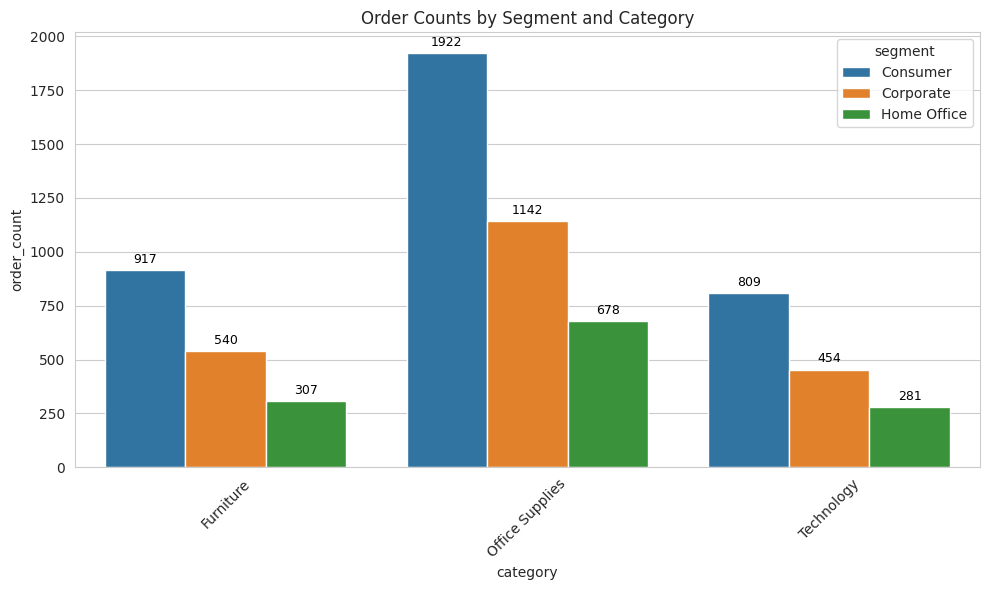

In [ ]:
# Category/Subcategory Preference
# Group by segment and category
category_pref = df.groupby(["segment", "category"]).agg(
    order_count=pd.NamedAgg(column="order_id", aggfunc="nunique")
).reset_index()

# Plot with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=category_pref, x="category", y="order_count", hue="segment")

plt.title("Order Counts by Segment and Category")
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')

plt.show()

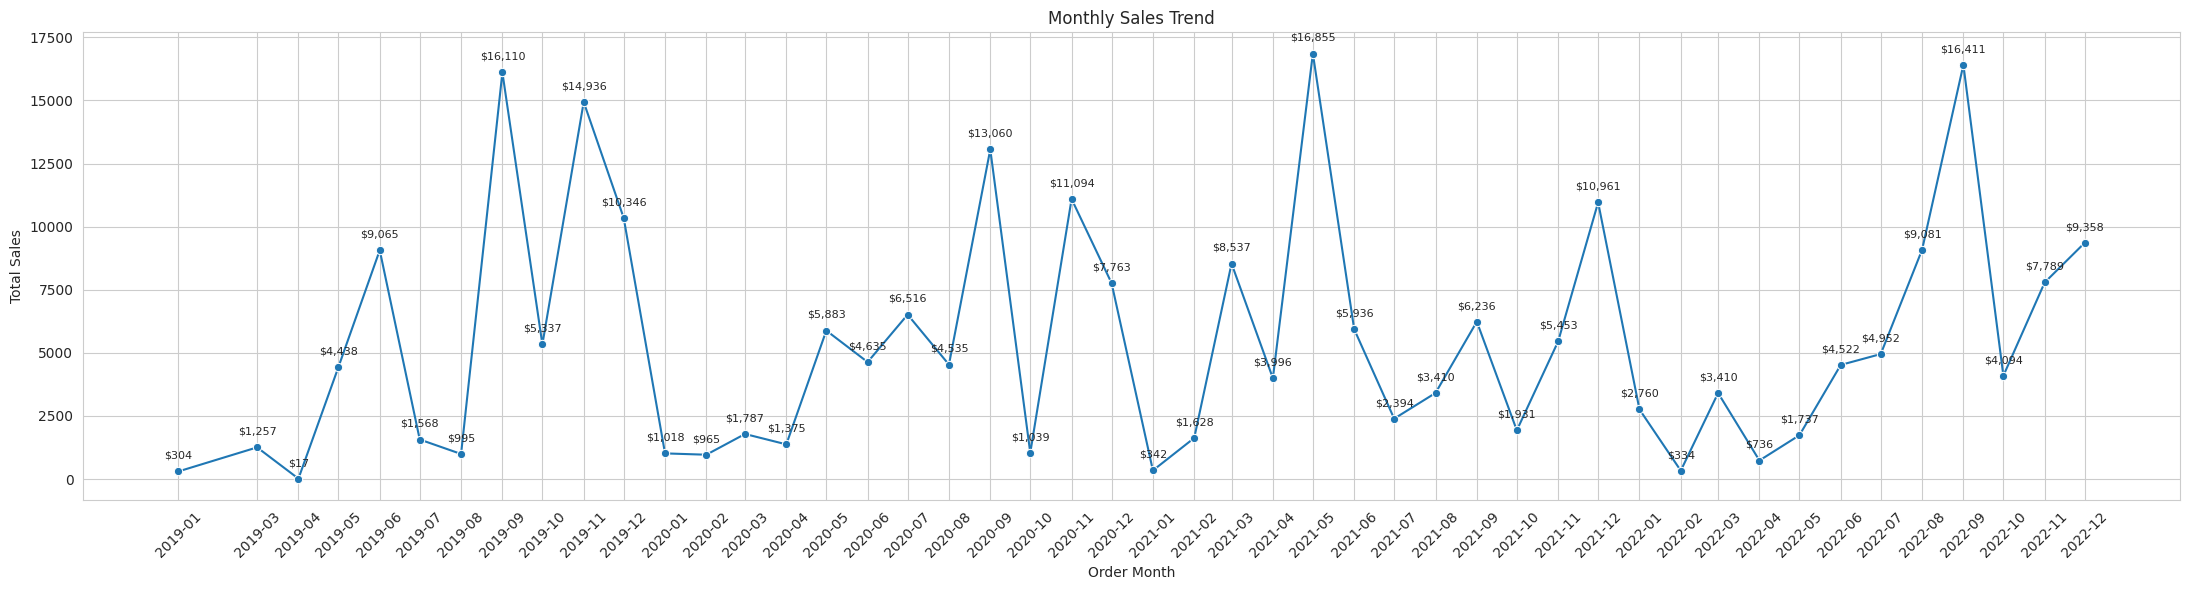

In [ ]:
# Seasonal or Monthly Trends
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure proper datetime conversion
monthly_trends["order_month_dt"] = pd.to_datetime(monthly_trends["order_month"])

plt.figure(figsize=(22, 6))  # Wide enough to show all months clearly
ax = sns.lineplot(data=monthly_trends, x="order_month_dt", y="sales", marker="o")

# Show all months on x-axis
ax.set_xticks(monthly_trends["order_month_dt"])
ax.set_xticklabels(monthly_trends["order_month"].tolist(), rotation=45)

# Add data labels for each point
for x, y in zip(monthly_trends["order_month_dt"], monthly_trends["sales"]):
    ax.text(x, y + 500, f"${y:,.0f}", ha="center", fontsize=8)

plt.title("Monthly Sales Trend")
plt.xlabel("Order Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [ ]:
column_list = df.columns.tolist()
column_str = ", ".join(column_list)
print(column_str)

order_id, order_date, ship_date, customer, manufactory, product_name, segment, category, subcategory, region, zip, city, state, country, discount, profit, quantity, sales, profit_margin


In [ ]:
import pandas as pd

# 1. Summary Table: Top Customers by Average Order Value
order_patterns = df.groupby("customer").agg(
    total_orders=pd.NamedAgg(column="order_id", aggfunc="nunique"),
    total_sales=pd.NamedAgg(column="sales", aggfunc="sum")
)
order_patterns["avg_order_value"] = order_patterns["total_sales"] / order_patterns["total_orders"]
top_customers = order_patterns.sort_values(by="avg_order_value", ascending=False).head(10).reset_index()

# 2. Summary Table: Order Counts by Segment and Category
category_summary = (
    df.groupby(["segment", "category"])
    .agg(order_count=("order_id", "nunique"))
    .sort_values(by="order_count", ascending=False)
    .reset_index()
)

# 3. Summary Table: Monthly Sales Trends (Top 12 Months)
monthly_trends["order_month_dt"] = pd.to_datetime(monthly_trends["order_month"])
top_months = monthly_trends.sort_values(by="sales", ascending=False).head(12).reset_index(drop=True)

# 4. Display all three summaries
print("\nTop Customers by AOV:")
print(top_customers.to_string(index=False))

print("\nOrder Counts by Segment and Category:")
print(category_summary.head(10).to_string(index=False))

print("\nTop 12 Months by Sales:")
print(top_months.to_string(index=False))



Top Customers by AOV:
            customer  total_orders  total_sales  avg_order_value
         Sean Miller             5    25043.050      5008.610000
        Tamara Chand             5    19052.218      3810.443600
        Tom Ashbrook             4    14595.620      3648.905000
      Grant Thornton             3     9351.212      3117.070667
        Becky Martin             4    11789.630      2947.407500
    Mitch Willingham             2     5253.876      2626.938000
        Raymond Buch             6    15117.339      2519.556500
  Christopher Conant             5    12129.072      2425.814400
        Peter Fuller             4     9062.864      2265.716000
Christopher Martinez             4     8954.020      2238.505000

Order Counts by Segment and Category:
    segment        category  order_count
   Consumer Office Supplies         1922
  Corporate Office Supplies         1142
   Consumer       Furniture          917
   Consumer      Technology          809
Home Office Office

In [ ]:
prompt = """
You are an expert data analyst working with a retail dataset from a Superstore. Below is a summary of key outputs from our customer behavior analysis. Use this data to analyze customer purchasing patterns and provide actionable insights.

---
Top Customers by Average Order Value (AOV):

customer                  | total_orders | total_sales | avg_order_value
--------------------------|--------------|-------------|-----------------
Sean Miller               | 5            | 25043.05    | 5008.61
Tamara Chand              | 5            | 19052.22    | 3810.44
Tom Ashbrook              | 4            | 14595.62    | 3648.91
Grant Thornton            | 3            | 9351.21     | 3117.07
Becky Martin              | 4            | 11789.63    | 2947.41
Mitch Willingham          | 2            | 5253.88     | 2626.94
Raymond Buch              | 6            | 15117.34    | 2519.56
Christopher Conant        | 5            | 12129.07    | 2425.81
Peter Fuller              | 4            | 9062.86     | 2265.72
Christopher Martinez      | 4            | 8954.02     | 2238.51

---
Order Counts by Segment and Category:

segment        | category        | order_count
---------------|------------------|--------------
Consumer        | Office Supplies  | 1922
Corporate       | Office Supplies  | 1142
Consumer        | Furniture        | 917
Consumer        | Technology       | 809
Home Office     | Office Supplies  | 678
Corporate       | Furniture        | 540
Corporate       | Technology       | 454
Home Office     | Furniture        | 307
Home Office     | Technology       | 281

---
Top 12 Months by Sales:

order_month | sales     | order_month_dt
-------------|-----------|-----------------
2021-05      | 16855.04  | 2021-05-01
2022-09      | 16410.64  | 2022-09-01
2019-09      | 16109.61  | 2019-09-01
2019-11      | 14936.06  | 2019-11-01
2020-09      | 13060.01  | 2020-09-01
2020-11      | 11093.87  | 2020-11-01
2021-12      | 10960.87  | 2021-12-01
2019-12      | 10346.32  | 2019-12-01
2022-12      | 9358.32   | 2022-12-01
2022-08      | 9080.87   | 2022-08-01
2019-06      | 9064.70   | 2019-06-01
2021-03      | 8536.73   | 2021-03-01

---
**Based on this data, what purchasing patterns can be observed?**

Please provide insights on:
1. The role of high AOV, low-frequency customers
2. Segment preferences across product categories
3. Seasonal or promotional timing patterns
4. Opportunities to improve customer retention or cross-category engagement
"""
response = model.generate_content(prompt)
print(response.text)

Of course. As an expert data analyst, I have analyzed the provided outputs. Here is a detailed breakdown of customer purchasing patterns and actionable insights.

### **Executive Summary**

The analysis reveals three distinct and critical patterns in customer behavior:

1.  **High-Value, Project-Based Customers:** A small cohort of customers drives a significant portion of revenue through very high Average Order Values (AOV) but with low purchase frequency. These are likely B2B clients or consumers making large, one-time purchases like an office setup.
2.  **Segment-Driven Product Preferences:** While Office Supplies dominate in order *volume* across all segments, this indicates they are a high-frequency, low-consideration purchase. Furniture and Technology, with fewer orders, likely represent higher-value, less frequent transactions.
3.  **Strong Q3/Q4 Seasonality:** Sales consistently peak in the September-December period, pointing to a predictable business cycle driven by end-of-qua

**3. How can we improve customer retention?**

In [ ]:
# Ensure datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Step 1: Churn risk — latest order
retention_df = df.groupby('customer').agg(
    total_orders=('order_id', 'nunique'),
    total_sales=('sales', 'sum'),
    segment=('segment', 'first'),
    last_order=('order_date', 'max'),
    first_order=('order_date', 'min')
).reset_index()

# Add churn signal
latest_date = df['order_date'].max()
retention_df['days_since_last_order'] = (latest_date - retention_df['last_order']).dt.days
retention_df['is_repeat_buyer'] = retention_df['total_orders'] > 1

# Step 2: Summary stats
repeat_vs_single = retention_df['is_repeat_buyer'].value_counts()
top_at_risk = retention_df.sort_values(by='days_since_last_order', ascending=False).head(10)
repeat_top_sales = retention_df[retention_df['is_repeat_buyer']].sort_values(by='total_sales', ascending=False).head(10)

# Step 3: Segment-level retention
segment_retention = retention_df.groupby('segment')['is_repeat_buyer'].mean().reset_index()
segment_retention['is_repeat_buyer'] = segment_retention['is_repeat_buyer'].round(2)

# Display outputs
print("Repeat vs. One-time Buyers:")
print(repeat_vs_single)

print("\nCustomers at Highest Risk of Churn:")
print(top_at_risk[['customer', 'last_order', 'days_since_last_order', 'total_sales']])

print("\nTop Repeat Buyers by Sales:")
print(repeat_top_sales[['customer', 'total_orders', 'total_sales']])

print("\nSegment-wise Repeat Buyer Rate:")
print(segment_retention)


Repeat vs. One-time Buyers:
is_repeat_buyer
True     781
False     12
Name: count, dtype: int64

Customers at Highest Risk of Churn:
              customer last_order  days_since_last_order  total_sales
570     Nicole Brennan 2019-10-22                   1165     273.8720
302  Georgia Rosenberg 2019-11-21                   1135    1284.3800
625    Ricardo Emerson 2019-12-29                   1097      48.3600
179     Craig Molinari 2020-03-01                   1034    3984.4524
777   Valerie Takahito 2020-04-05                    999    1736.5960
598      Pauline Chand 2020-08-01                    881    1061.4880
34        Andy Gerbode 2020-09-07                    844    1455.0380
606       Peter Fuller 2020-09-17                    834    9062.8640
209     David Philippe 2020-10-10                    811    1058.6160
177      Craig Carroll 2020-10-23                    798    2854.1150

Top Repeat Buyers by Sales:
               customer  total_orders  total_sales
686         Sean 

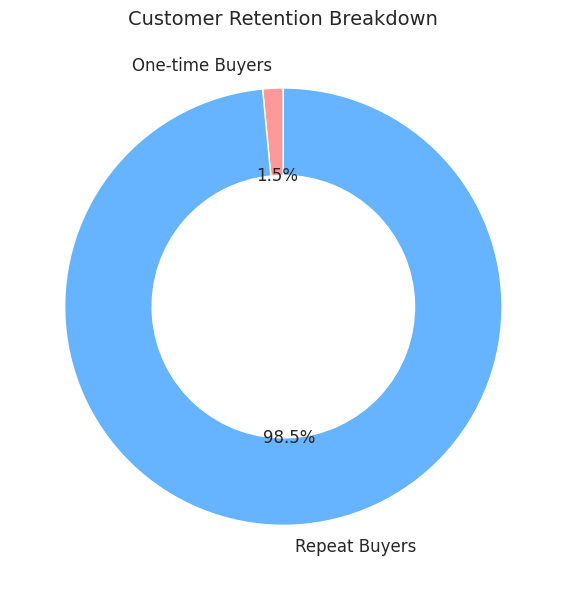

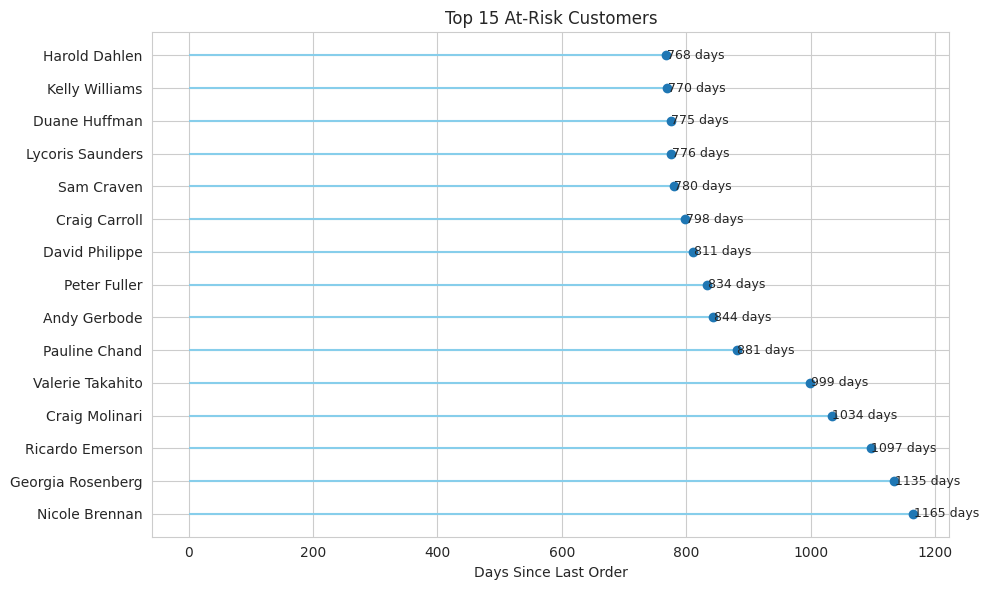

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Donut Chart: Repeat vs. One-time Buyers
repeat_counts = retention_df['is_repeat_buyer'].value_counts()
labels = ['One-time Buyers', 'Repeat Buyers']
sizes = [repeat_counts[False], repeat_counts[True]]
colors = ['#ff9999', '#66b3ff']

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    wedgeprops={'width': 0.4},
    autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
ax.set_title("Customer Retention Breakdown", fontsize=14)
plt.tight_layout()
plt.show()

# Lollipop Chart: Top 15 Customers with Longest Gaps
top_churn = retention_df.sort_values(by='days_since_last_order', ascending=False).head(15)

plt.figure(figsize=(10,6))
plt.hlines(y=top_churn['customer'], xmin=0, xmax=top_churn['days_since_last_order'], color='skyblue')
plt.plot(top_churn['days_since_last_order'], top_churn['customer'], "o")

# Add data labels
for i, (x, y) in enumerate(zip(top_churn['days_since_last_order'], top_churn['customer'])):
    plt.text(x + 1, y, f'{x} days', va='center', fontsize=9)

plt.xlabel("Days Since Last Order")
plt.title("Top 15 At-Risk Customers")
plt.tight_layout()
plt.show()

In [ ]:
prompt = """
You are a customer analytics expert analyzing retention data for a Superstore retail dataset. Below is a summary of key outputs identifying patterns in customer behavior, particularly repeat buyers and churn risk.

---
Repeat vs. One-time Buyers:
- Repeat Buyers: 781
- One-time Buyers: 12

---
Top 10 Customers at Highest Risk of Churn:
(customer | days since last order | total sales)
- Nicole Brennan | 1165 days | $273.87
- Georgia Rosenberg | 1135 days | $1,284.38
- Ricardo Emerson | 1097 days | $48.36
- Craig Molinari | 1034 days | $3,984.45
- Valerie Takahito | 999 days | $1,736.60
- Pauline Chand | 881 days | $1,061.49
- Andy Gerbode | 844 days | $1,455.04
- Peter Fuller | 834 days | $9,062.86
- David Philippe | 811 days | $1,058.62
- Craig Carroll | 798 days | $2,854.12

---
Top Repeat Buyers by Total Sales:
(customer | total orders | total sales)
- Sean Miller | 5 orders | $25,043.05
- Tamara Chand | 5 orders | $19,052.22
- Raymond Buch | 6 orders | $15,117.34
- Tom Ashbrook | 4 orders | $14,595.62
- Adrian Barton | 10 orders | $14,473.57
- Ken Lonsdale | 12 orders | $14,175.23
- Sanjit Chand | 9 orders | $14,142.33
- Hunter Lopez | 6 orders | $12,873.30
- Sanjit Engle | 11 orders | $12,209.44
- Christopher Conant | 5 orders | $12,129.07

---
Segment-wise Repeat Buyer Rate:
- Consumer: 99%
- Corporate: 98%
- Home Office: 99%

---
**Prompt:**
Based on this updated data, provide insights into how we can improve customer retention.

1. What trends or red flags do you notice about customers at risk of churn?
2. What distinguishes high-value repeat buyers?
3. Are there any gaps or opportunities within the current customer segments?
4. Propose specific, data-driven strategies we can implement to retain customers, reduce churn, or encourage cross-segment engagement.
"""
response = model.generate_content(prompt)
print(response.text)

Of course. As a customer analytics expert, here is a detailed analysis of the provided data and a set of actionable strategies to improve customer retention.

### **Executive Summary**

The data reveals a dual-sided story: our company excels at securing an initial repeat purchase, with a near-perfect repeat buyer rate across all segments. However, this masks a critical long-term retention problem. We are experiencing significant churn among established customers, including some of our previously highest-value clients. Our core challenge is not converting one-time buyers, but rather maintaining engagement with our existing customer base to prevent them from becoming dormant.

---

### **1. Trends and Red Flags in Customers at Risk of Churn**

The churn risk list highlights two immediate and significant red flags:

*   **Churn is a Problem of Long-Term Disengagement:** The primary indicator of churn is time. The "at-risk" customers have not made a purchase in **798 to 1165 days (2.2 to 3

**Required Analysis:**

Customer segmentation and profiling

Purchase pattern analysis

Customer lifetime value indicators

In [ ]:
# Customer Segmentation and Profiling
!pip install plotly --quiet
import plotly.express as px

# Aggregate sales by segment and region
treemap_data = df.groupby(["segment", "region"])["sales"].sum().reset_index()

# Build treemap
fig = px.treemap(
    treemap_data,
    path=["segment", "region"],
    values="sales",
    color="sales",
    color_continuous_scale="Blues",
    title="Total Sales Treemap by Segment and Region"
)

fig.update_traces(textinfo="label+value+percent parent")
fig.show()

In [ ]:
# Summary table for Segment and Region sales
seg_region_sales = df.groupby(["segment", "region"])["sales"].sum().reset_index().sort_values(by="sales", ascending=False)
print("Sales by Segment and Region:")
display(seg_region_sales)

Sales by Segment and Region:


,segment,region,sales
3,Consumer,West,362880.7730
1,Consumer,East,350908.1670
0,Consumer,Central,252031.4340
7,Corporate,West,225855.2745
5,Corporate,East,200409.3470
2,Consumer,South,195580.9710
4,Corporate,Central,157995.8128
11,Home Office,West,136721.7770
9,Home Office,East,127463.7260
6,Corporate,South,121885.9325


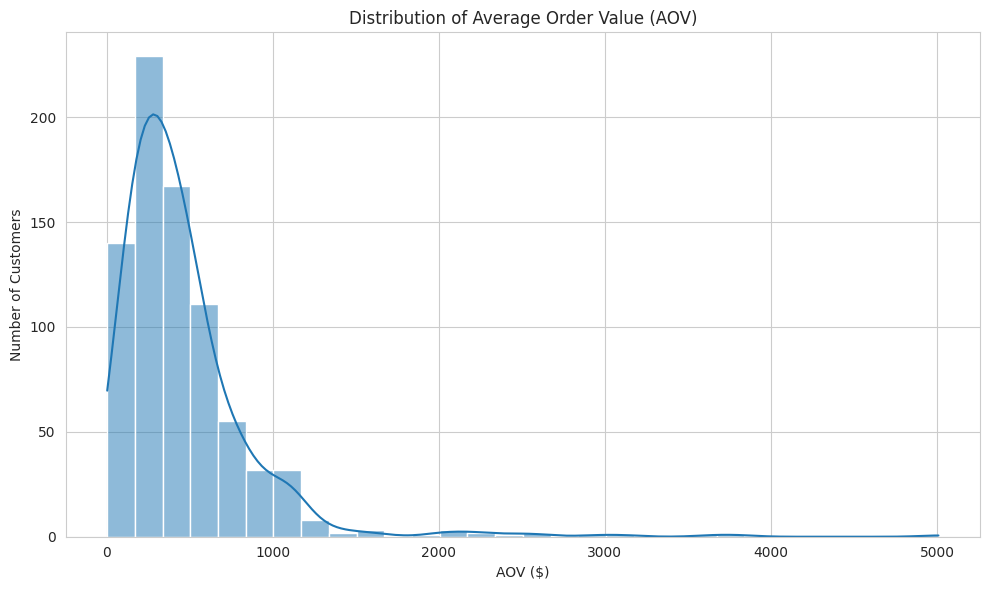

In [ ]:
# Purchase Pattern Analysis
# Histogram of AOV across customers
order_patterns = df.groupby("customer").agg(
    total_orders=pd.NamedAgg(column="order_id", aggfunc="nunique"),
    total_sales=pd.NamedAgg(column="sales", aggfunc="sum"),
)
order_patterns["avg_order_value"] = order_patterns["total_sales"] / order_patterns["total_orders"]

plt.figure(figsize=(10, 6))
sns.histplot(order_patterns["avg_order_value"], bins=30, kde=True)
plt.title("Distribution of Average Order Value (AOV)")
plt.xlabel("AOV ($)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

In [ ]:
# Summary stats for AOV
aov_stats = order_patterns["avg_order_value"].describe()
print("Summary of Average Order Value (AOV):")
print(aov_stats)
top_aov_customers = order_patterns.sort_values(by="avg_order_value", ascending=False).head(10)
print("Top 10 Customers by AOV:")
display(top_aov_customers)

Summary of Average Order Value (AOV):
count     793.000000
mean      460.147734
std       433.400951
min         2.416500
25%       213.255333
50%       362.503250
75%       550.377000
max      5008.610000
Name: avg_order_value, dtype: float64
Top 10 Customers by AOV:


,total_orders,total_sales,avg_order_value
customer,,,
Sean Miller,5,25043.050,5008.610000
Tamara Chand,5,19052.218,3810.443600
Tom Ashbrook,4,14595.620,3648.905000
Grant Thornton,3,9351.212,3117.070667
Becky Martin,4,11789.630,2947.407500
Mitch Willingham,2,5253.876,2626.938000
Raymond Buch,6,15117.339,2519.556500
Christopher Conant,5,12129.072,2425.814400
Peter Fuller,4,9062.864,2265.716000


In [ ]:
# Sort but include more customers
clv_all = df.groupby("customer").agg(
    total_sales=("sales", "sum"),
    total_orders=("order_id", "nunique"),
    avg_order_value=("sales", "mean"),
    last_order=("order_date", "max")
).reset_index()

clv_all["days_since_last_order"] = (pd.to_datetime("2023-12-31") - clv_all["last_order"]).dt.days

# Optional: top N customers by sales
clv_all = clv_all.sort_values(by="total_sales", ascending=False).head(50)

# Bubble Chart
import plotly.express as px

fig = px.scatter(
    clv_all,
    x="avg_order_value",
    y="total_orders",
    size="total_sales",
    color="days_since_last_order",
    hover_name="customer",
    color_continuous_scale="RdYlGn_r",
    size_max=60,
    title="Top 50 Customers by Lifetime Value Proxy"
)

fig.update_layout(
    xaxis_title="Average Order Value",
    yaxis_title="Total Orders",
    coloraxis_colorbar=dict(
        title="Recency (Days)",
        ticks="outside"
    )
)

fig.show()

In [ ]:
print("Top 20 Customers by Lifetime Value Proxy:")
display(clv_all[["customer", "total_sales", "total_orders", "avg_order_value", "days_since_last_order"]].head(20))

Top 20 Customers by Lifetime Value Proxy:


,customer,total_sales,total_orders,avg_order_value,days_since_last_order
686,Sean Miller,25043.050,5,1669.536667,445
730,Tamara Chand,19052.218,5,1587.684833,765
622,Raymond Buch,15117.339,6,839.852167,462
757,Tom Ashbrook,14595.620,4,1459.562000,435
6,Adrian Barton,14473.571,10,723.678550,407
441,Ken Lonsdale,14175.229,12,488.801000,413
671,Sanjit Chand,14142.334,9,642.833364,715
334,Hunter Lopez,12873.298,6,1170.299818,409
672,Sanjit Engle,12209.438,11,642.602000,375
156,Christopher Conant,12129.072,5,1102.642909,409


In [ ]:
prompt = """
You are an expert business data analyst. Below is a summary of outputs from a retail dataset, including customer segmentation, purchase behavior, and lifetime value indicators. Please provide actionable insights in the following three areas:

1. **Customer Segmentation and Profiling**
2. **Purchase Pattern Analysis**
3. **Customer Lifetime Value Indicators**

---

**Customer Segmentation: Sales by Segment and Region**

segment           | region  | sales
------------------|---------|-----------
Consumer          | West    | 362,880.77
Consumer          | East    | 350,908.17
Consumer          | Central | 252,031.43
Corporate         | West    | 225,855.27
Corporate         | East    | 200,409.35
Consumer          | South   | 195,580.97
Corporate         | Central | 157,995.81
Home Office       | West    | 136,721.78
Home Office       | East    | 127,463.73
Corporate         | South   | 121,885.93
Home Office       | Central | 91,212.64
Home Office       | South   | 74,255.00

---

**Purchase Pattern Analysis: AOV Summary and Top Customers**

AOV Summary:
- Count: 793 customers
- Mean: $460.15
- Std: $433.40
- Min: $2.42
- 25th %ile: $213.26
- Median: $362.50
- 75th %ile: $550.38
- Max: $5,008.61

Top 10 Customers by AOV:
Customer              | Orders | Sales    | AOV
----------------------|--------|----------|----------
Sean Miller           | 5      | 25,043.05| 5,008.61
Tamara Chand          | 5      | 19,052.22| 3,810.44
Tom Ashbrook          | 4      | 14,595.62| 3,648.91
Grant Thornton        | 3      | 9,351.21 | 3,117.07
Becky Martin          | 4      | 11,789.63| 2,947.41
Mitch Willingham      | 2      | 5,253.88 | 2,626.94
Raymond Buch          | 6      | 15,117.34| 2,519.56
Christopher Conant    | 5      | 12,129.07| 2,425.81
Peter Fuller          | 4      | 9,062.86 | 2,265.72
Christopher Martinez  | 4      | 8,954.02 | 2,238.51

---

**Customer Lifetime Value Indicators: Top 20 Customers**

Customer              | Total Sales | Orders | AOV     | Days Since Last Order
----------------------|-------------|--------|---------|-----------------------
Sean Miller           | 25,043.05   | 5      | 1,669.54| 445
Tamara Chand          | 19,052.22   | 5      | 1,587.68| 765
Raymond Buch          | 15,117.34   | 6      | 839.85  | 462
Tom Ashbrook          | 14,595.62   | 4      | 1,459.56| 435
Adrian Barton         | 14,473.57   | 10     | 723.68  | 407
Ken Lonsdale          | 14,175.23   | 12     | 488.80  | 413
Sanjit Chand          | 14,142.33   | 9      | 642.83  | 715
Hunter Lopez          | 12,873.30   | 6      | 1,170.30| 409
Sanjit Engle          | 12,209.44   | 11     | 642.60  | 375
Christopher Conant    | 12,129.07   | 5      | 1,102.64| 409
Todd Sumrall          | 11,891.75   | 6      | 792.78  | 402
Greg Tran             | 11,820.12   | 11     | 407.59  | 402
Becky Martin          | 11,789.63   | 4      | 736.85  | 673
Seth Vernon           | 11,470.95   | 10     | 358.47  | 467
Caroline Jumper       | 11,164.97   | 8      | 558.25  | 555
Clay Ludtke           | 10,880.55   | 12     | 388.59  | 650
Maria Etezadi         | 10,663.73   | 10     | 484.71  | 408
Karen Ferguson        | 10,604.27   | 7      | 589.13  | 463
Bill Shonely          | 10,501.65   | 5      | 1,166.85| 924
Edward Hooks          | 10,310.88   | 12     | 322.22  | 501

---

**Instructions:**
Use the above to identify:
- Key insights from segment-region performance
- Patterns in purchase behavior and how they may affect pricing or promotions
- Trends among high-value customers and any signs of churn
- Recommendations for improving retention and targeting based on segment or AOV/recency

Keep recommendations grounded in the data above. Prioritize clarity and business impact.
"""

response = model.generate_content(prompt)
print(response.text)

Of course. As an expert business data analyst, here is a detailed analysis with actionable insights based on the provided data summaries.

### **Executive Summary**

The analysis reveals a business with strong performance in the Consumer segment and in the West and East regions. However, there is a critical and immediate threat of customer churn, as even our historically highest-value customers have not made a purchase in over a year. Purchase behavior is highly variable, suggesting a need for a tiered customer strategy. The following report details specific insights and provides recommendations to capitalize on strengths, mitigate churn risk, and optimize marketing efforts.

---

### **1. Customer Segmentation and Profiling**

This section analyzes the performance across different customer segments and regions.

**Key Insights:**

*   **Segment Dominance:** The **Consumer** segment is the primary engine of revenue, generating **$909,391.34** in sales, which accounts for approximately 